In [155]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import h5py
import pandas as pd

In [256]:
ds_file='CAMP2Ex-Hawk2DS10_Learjet_20190909_RA.ict'
fcdp_file='CAMP2Ex-HawkFCDP_Learjet_20190909_RA.ict'
nav_file='CAMP2Ex-Page0_Learjet_20190909_RA.ict.txt'
header_length = pd.read_csv(ds_file,nrows=0)
header_length = int(header_length.columns[0])
data1 = pd.read_csv(ds_file,skiprows=header_length-1)

header_length = pd.read_csv(fcdp_file,nrows=0)
header_length = int(header_length.columns[0])
data2 = pd.read_csv(fcdp_file,skiprows=header_length-1)

header_length = pd.read_csv(nav_file,nrows=0)
header_length = int(header_length.columns[0])
data3 = pd.read_csv(nav_file,skiprows=header_length-1)
data3.loc[:,'height']=data3['Palt']/3.28

In [257]:
data1.columns

Index(['Time_Start', 'sv', 'conc', 'ext', 'iwc', 'irregularCNT',
       'meanDiameter', 'meanVolDiam', 'effectiveDiam', 'cbin01',
       ...
       'nbin53', 'nbin54', 'nbin55', 'nbin56', 'nbin57', 'nbin58', 'nbin59',
       'nbin60', 'nbin61', 'totaln'],
      dtype='object', length=254)

In [258]:
data5 = pd.merge(
    data3,
    data1,
    on='Time_Start',
    how='inner')
dsdf = data5
dsdf.reset_index(drop=True, inplace=True)

In [260]:
dsdf = dsdf[dsdf['sv'] != -999]
#dpdf = dpdf[dpdf['nbin01'] != -999]

In [261]:
dsdf

,Time_Start,TAS,Palt,Hdg,Temp,Dew,NevLWC,FSSPWC,FCDPHWC,FCDPWC,...,nbin53,nbin54,nbin55,nbin56,nbin57,nbin58,nbin59,nbin60,nbin61,totaln
0,3108,37,464,204,24.1,23.9,0.0,-999.0,0.2,-999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3109,42,479,203,24.0,24.2,0.0,-999.0,0.2,-999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3110,44,478,203,24.1,23.9,0.0,-999.0,0.1,-999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3111,47,484,204,24.0,24.3,0.0,-999.0,0.1,-999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3112,50,481,204,24.0,24.1,0.0,-999.0,0.1,-999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11216,14324,158,18031,287,-11.6,-6.5,0.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1400.0
11217,14325,158,18030,287,-11.6,-6.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1400.0
11218,14326,158,18031,287,-11.6,-6.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1400.0
11219,14327,158,18029,287,-11.5,-6.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1400.0


In [341]:
a=dsdf.iloc[:,37:97].replace(-9.99,0.0)
b=dsdf.iloc[:,98:158].replace(-999,0.0)
b=b*10
c=dsdf.iloc[:,159:219].replace(-999,0.0)

In [342]:
bin_centre1 = list(np.arange(10,195+15,10))
bin_width1 = [10]*len(bin_centre1)
bin_head1 = list(np.arange(5,195+15,10))

bin_centre2 = list(np.arange(215,495+20,20))
bin_width2 = [20]*len(bin_centre2)
bin_head2 = list(np.arange(225,495+20,20))

bin_centre3 = list(np.arange(530,980+50,50))
bin_width3 = [50]*len(bin_centre3)
bin_head3 = list(np.arange(555,980+50,50))

bin_centre4 = list(np.arange(1055,1955+100,100))
bin_width4 = [100]*len(bin_centre4)
bin_head4 = list(np.arange(1105,1955+50,100))

bin_centre5 = list(np.arange(2105,2905+200,200))
bin_width5 = [200]*len(bin_centre5)
bin_head5 = list(np.arange(2005,2905+100,200))

bin_centres = np.array(bin_centre1+bin_centre2+bin_centre3+bin_centre4+bin_centre5)
bin_widths = np.array(bin_width1+bin_width2+bin_width3+bin_width4+bin_width5)
bin_heads = np.array(bin_head1+bin_head2+bin_head3+bin_head4+bin_head5)

In [343]:
bin_centres

array([  10,   20,   30,   40,   50,   60,   70,   80,   90,  100,  110,
        120,  130,  140,  150,  160,  170,  180,  190,  200,  215,  235,
        255,  275,  295,  315,  335,  355,  375,  395,  415,  435,  455,
        475,  495,  530,  580,  630,  680,  730,  780,  830,  880,  930,
        980, 1055, 1155, 1255, 1355, 1455, 1555, 1655, 1755, 1855, 1955,
       2105, 2305, 2505, 2705, 2905])

In [344]:
bin_heads

array([   5,   15,   25,   35,   45,   55,   65,   75,   85,   95,  105,
        115,  125,  135,  145,  155,  165,  175,  185,  195,  205,  225,
        245,  265,  285,  305,  325,  345,  365,  385,  405,  425,  445,
        465,  485,  505,  555,  605,  655,  705,  755,  805,  855,  905,
        955, 1005, 1105, 1205, 1305, 1405, 1505, 1605, 1705, 1805, 1905,
       2005, 2205, 2405, 2605, 2805])

In [345]:
#calculating De using # concentration (cbin)
cconc_nom=(a*bin_widths*(bin_centres**3)).sum(axis=1)
cconc_denom=(a*bin_widths*(bin_centres**2)).sum(axis=1)
de_cconc=cconc_nom/cconc_denom

In [346]:
#calculating De using Volume/area
volume=(c*bin_widths).sum(axis=1)
area=(b*bin_widths).sum(axis=1)
de_va=volume/area
de_va=de_va*10**4
de_va=de_va*1.5*1

In [347]:
de_va

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
11216    107.490079
11217    106.258907
11218    109.904118
11219    106.636948
11220    112.889487
Length: 10724, dtype: float64

In [348]:
dsdf.effectiveDiam

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
         ...  
11216    107.5
11217    106.2
11218    109.8
11219    106.6
11220    112.9
Name: effectiveDiam, Length: 10724, dtype: float64

In [349]:
dsdf.loc[:,'De1']= de_cconc.values
dsdf.loc[:,'De2']= de_va.values

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [350]:
#fcdp=dpdf[dpdf['conc']>10000]

twods=dsdf[dsdf['conc']>10000]
twods['Time_Start']=(twods['Time_Start'])/3600
#fcdp=dpdf
#twods=dsdf

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [351]:
twods

,Time_Start,TAS,Palt,Hdg,Temp,Dew,NevLWC,FSSPWC,FCDPHWC,FCDPWC,...,nbin55,nbin56,nbin57,nbin58,nbin59,nbin60,nbin61,totaln,De1,De2
143,0.903056,89,4814,172,17.9,18.5,0.0,0.1,0.4,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4600.0,66.642305,25.000556
144,0.903333,89,4829,170,18.0,18.5,0.0,0.2,0.5,0.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9900.0,55.929001,24.782376
145,0.903611,89,4837,168,18.1,18.3,0.0,0.3,0.4,0.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7900.0,90.826778,25.237057
146,0.903889,89,4852,167,18.1,18.7,0.0,0.2,0.5,0.3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3800.0,778.275037,21.989853
147,0.904167,88,4870,166,18.2,18.6,0.0,0.3,0.6,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18000.0,45.391538,20.466472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,3.951667,173,18269,285,-14.4,30.5,0.1,0.1,0.1,0.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8300.0,496.619628,83.515807
11119,3.951944,173,18256,285,-14.4,30.9,0.1,0.1,0.1,0.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5800.0,642.818921,90.808838
11120,3.952222,173,18247,285,-14.4,31.0,0.1,0.1,0.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4900.0,624.803918,95.228785
11121,3.952500,173,18234,285,-14.4,31.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4600.0,678.000416,102.222699


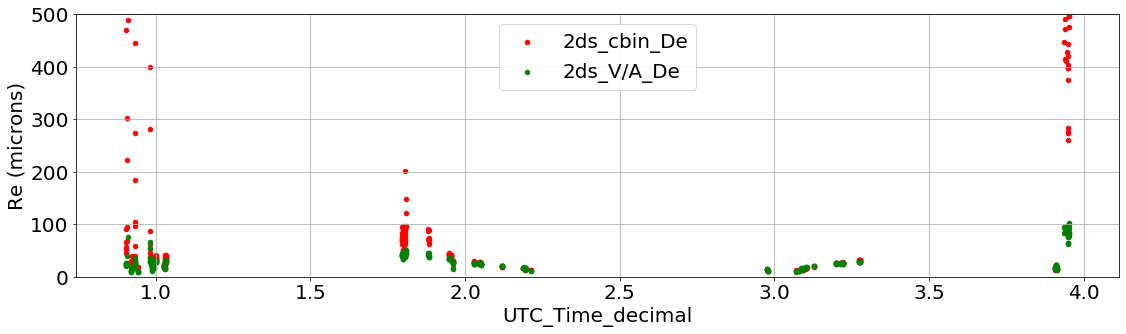

In [352]:
#plt.xlim(18.75,18.9)
plt.figure(figsize=(16,5))
cm = plt.cm.get_cmap('jet')
#cm = plt.cm.get_cmap('jet')
#xy = range(20)
#z = xy
plt.scatter(twods['Time_Start'].values, twods['De1'].values, label='2ds_cbin_De',s=20,color='red')
#plt.scatter(twods['Time_Start'].values, (twods['Re2'].values)/2, label='2ds_cbin_De/2',s=20,color='orange')
#plt.scatter(twods['Time_Start'].values, twods['Re3'].values, label='2ds_cbin_bin/2_Re',s=20,color='green')
plt.scatter(twods['Time_Start'].values, (twods['De2'].values), label='2ds_V/A_De',s=20,color='green')
#plt.scatter(twods['Time_Start'].values, twods.effectiveDiam, label='2ds_Effec_De',s=20,color='blue')
#plt.scatter(fcdp['Time_Start'].values, fcdp['Re'].values, label='fcdp_cbin_Re',s=20,color='green')
#cb = plt.colorbar()
#plt.clim(0, 7000)
#plt.scatter(gpstime_res,bo_re_res,label='Pol-',s=12)
#plt.plot(glat_21[cond],bi_re21[cond])
#plt.plot(glat_21[cond],bo_re[cond])
plt.legend(loc=0)
plt.grid(True)
#plt.xlim(3.25,3.3)
plt.ylim(0,500)
plt.xlabel('UTC_Time_decimal')
plt.ylabel('Re (microns)')
plt.rcParams.update({'font.size': 20})

plt.tight_layout(True)

plt.show()

#cmap = plt.get_cmap('jet', 20)
#cmap.set_under('white')

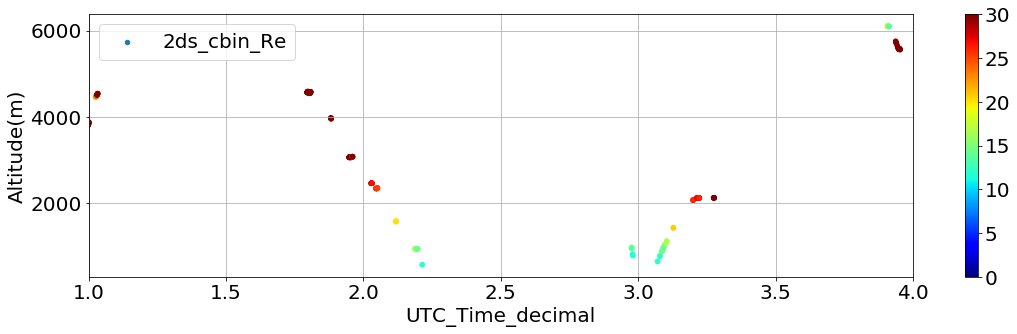

In [354]:
#plt.xlim(18.75,18.9)
plt.figure(figsize=(16,5))
cm = plt.cm.get_cmap('jet')
#cm = plt.cm.get_cmap('jet')
#xy = range(20)
#z = xy
#plt.scatter(twods['Time_Start'].values, twods['Re'].values, label='2ds_cbin_Re',s=20,color='red')
#plt.scatter(twods['Time_Start'].values, twods.effectiveDiam/2, label='2ds_Effec_Re',s=20,color='blue')
#plt.scatter(fcdp['Time_Start'].values, fcdp['height'].values, c=fcdp['Re'].values, label='fcdp_cbin_Re',s=20,cmap=cm)
plt.scatter(twods['Time_Start'].values, twods['height'].values, c=twods['De1'].values, label='2ds_cbin_Re',s=20,cmap=cm)
cb = plt.colorbar()
plt.clim(0, 30)
#plt.scatter(gpstime_res,bo_re_res,label='Pol-',s=12)
#plt.plot(glat_21[cond],bi_re21[cond])
#plt.plot(glat_21[cond],bo_re[cond])
plt.legend(loc=0)
plt.grid(True)
plt.xlim(1,4)
#plt.ylim(0,100)
plt.xlabel('UTC_Time_decimal')
plt.ylabel('Altitude(m)')
plt.rcParams.update({'font.size': 20})

plt.tight_layout(True)

plt.show()

#cmap = plt.get_cmap('jet', 20)
#cmap.set_under('white')

In [355]:
twods=twods[twods.effectiveDiam>0]

In [356]:
twods=twods[twods.irregularCNT==0.0]

In [357]:
#c=fcdp[(fcdp['Time_Start']>1.8)&(fcdp['Time_Start']<2.3)]
d=twods[(twods['Time_Start']>1.8)&(twods['Time_Start']<2.3)]

In [378]:
d.iloc[:,37:97]

,cbin01,cbin02,cbin03,cbin04,cbin05,cbin06,cbin07,cbin08,cbin09,cbin10,...,cbin51,cbin52,cbin53,cbin54,cbin55,cbin56,cbin57,cbin58,cbin59,cbin60
3373,19040.0,4452.00,1796.000,1538.0000,1786.0000,443.70000,110.60000,31.01000,11.830,5.819,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3374,20540.0,4688.00,1922.000,1672.0000,1811.0000,450.90000,120.60000,37.37000,16.500,9.232,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3375,18100.0,4046.00,1778.000,1628.0000,1673.0000,391.90000,107.80000,35.70000,16.930,9.382,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3376,15980.0,3726.00,1656.000,1417.0000,1533.0000,377.10000,101.40000,33.84000,15.060,8.235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3377,5710.0,1407.00,732.800,634.2000,591.4000,129.10000,39.10000,13.35000,6.153,3.661,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,1575.0,197.10,4.486,0.4288,0.3468,0.06647,0.00000,0.00000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4802,1696.0,282.90,7.260,0.6248,0.2507,0.03338,0.00000,0.02518,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4805,1208.0,193.10,5.977,0.2903,0.1007,0.00000,0.00000,0.00000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4863,1262.0,39.86,2.222,0.5928,0.5403,0.08136,0.05151,0.00000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


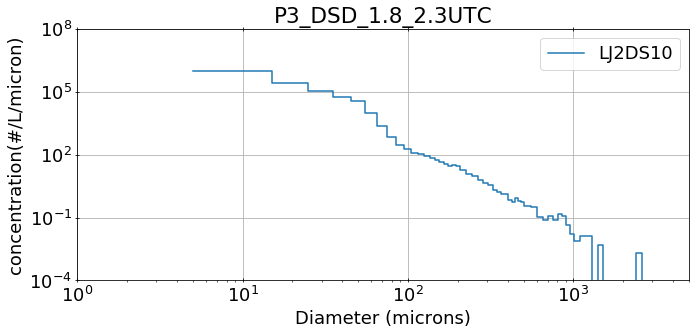

In [384]:
fig, ax1 = plt.subplots(figsize=(10,5))
plt.step(bin_heads,d.iloc[:,37:97].sum(), label='LJ2DS10',where='post')
#plt.step(y,f.iloc[0,34:54], label='FCDP',where='post')
ax1.tick_params(axis='both',direction='inout',top=True)

plt.xlabel('Diameter (microns)')
plt.ylabel('concentration(#/L/micron)')
plt.xscale('log')
plt.yscale('log')
plt.title('P3_DSD_1.8_2.3UTC')
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.xlim(1,5000)
plt.ylim(10**-4,10**8)

plt.rcParams.update({'font.size': 18})


plt.show()

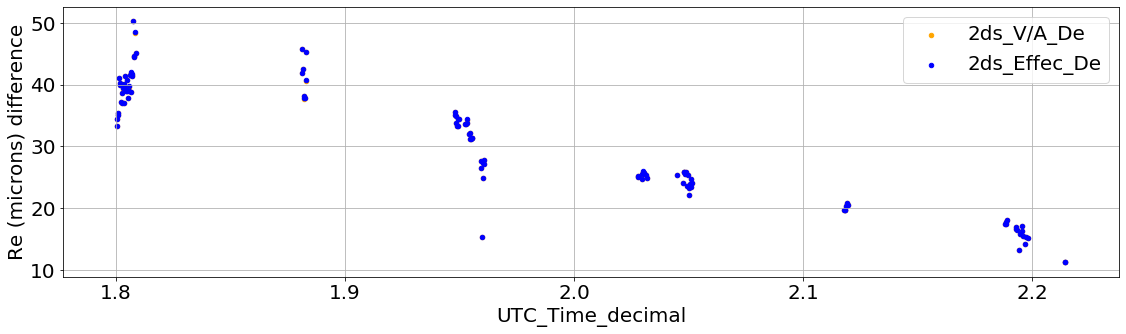

In [365]:
#plt.xlim(18.75,18.9)
plt.figure(figsize=(16,5))
cm = plt.cm.get_cmap('jet')
#cm = plt.cm.get_cmap('jet')
#xy = range(20)
#z = xy
#plt.scatter(d['Time_Start'].values, d['Re1'].values, label='2ds_cbin_Re',s=20,color='red')
plt.scatter(d['Time_Start'].values, d['De2'].values , label='2ds_V/A_De',s=20,color='orange')
plt.scatter(d['Time_Start'].values, d.effectiveDiam, label='2ds_Effec_De',s=20,color='blue')
#plt.scatter(d['Time_Start'].values, d['Re3'].values, label='fcdp_cbin_Re',s=20,color='green')
#cb = plt.colorbar()
#plt.clim(0, 7000)
#plt.scatter(gpstime_res,bo_re_res,label='Pol-',s=12)
#plt.plot(glat_21[cond],bi_re21[cond])
#plt.plot(glat_21[cond],bo_re[cond])
plt.legend(loc=0)
plt.grid(True)
#plt.xlim(3.25,3.3)
#plt.ylim(-2,2)
plt.xlabel('UTC_Time_decimal')
plt.ylabel('Re (microns) difference')
plt.rcParams.update({'font.size': 20})

plt.tight_layout(True)

plt.show()

#cmap = plt.get_cmap('jet', 20)
#cmap.set_under('white')

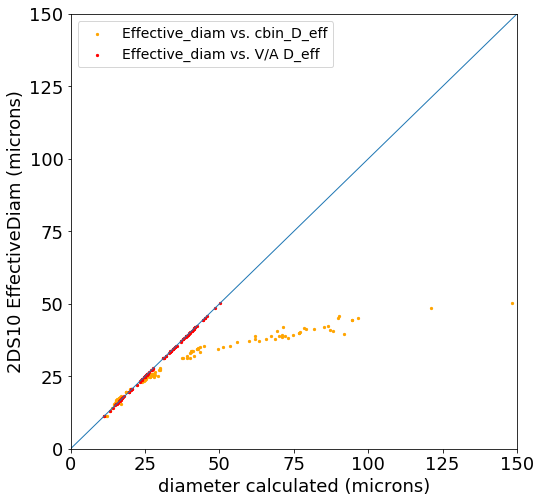

In [385]:
plt.figure(figsize=(8,8))
plt.scatter(((d['De1'].values)), d.effectiveDiam, label='Effective_diam vs. cbin_D_eff',s=5,color='orange')
plt.scatter(d['De2'].values, d.effectiveDiam, label='Effective_diam vs. V/A D_eff',s=5,color='red')
plt.plot(np.arange(0,150,0.01),np.arange(0,150,0.01),linewidth=1)
plt.xlabel('diameter calculated (microns)')
plt.ylabel('2DS10 EffectiveDiam (microns)')
plt.xlim(0,150)
plt.xticks(np.arange(0, 151, 25))
plt.ylim(0,150)
plt.yticks(np.arange(0, 151, 25))
plt.legend(loc=0,fontsize=14)
plt.show()